<a href="https://colab.research.google.com/github/NsikakMenim/Machine-Learning-Portfolio./blob/main/bone_marrow_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


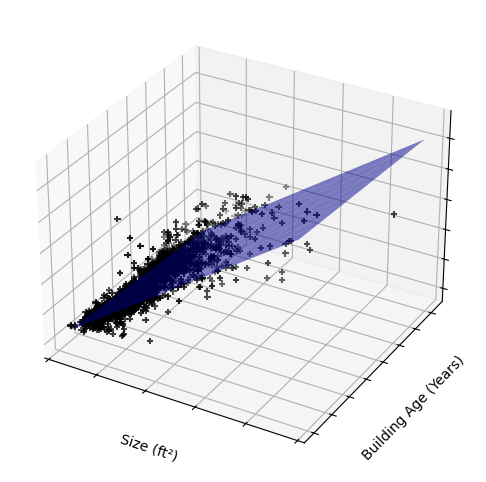

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

# Define features and target
X = df[['size_sqft', 'building_age_yrs']]
y = df['rent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=6)

# Train model
ols = LinearRegression()
ols.fit(X_train, y_train)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of training data
ax.scatter(X_train['size_sqft'], X_train['building_age_yrs'], y_train, c='k', marker='+')

# Create grid for surface plot
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train['size_sqft'].min(), X_train['size_sqft'].max(), 10),
    np.linspace(X_train['building_age_yrs'].min(), X_train['building_age_yrs'].max(), 10)
)

# Prepare input data for prediction
xy_surf = np.c_[x_surf.ravel(), y_surf.ravel()]
z_surf = ols.predict(xy_surf).reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='b')

# Set labels
ax.set_xlabel('Size (ft²)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df1 = pd.DataFrame(streeteasy)

x = df1[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df1[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# Add the code here:

mlr = LinearRegression()

mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-3-cc5281df2f90>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted rent: $%.2f" % predict)


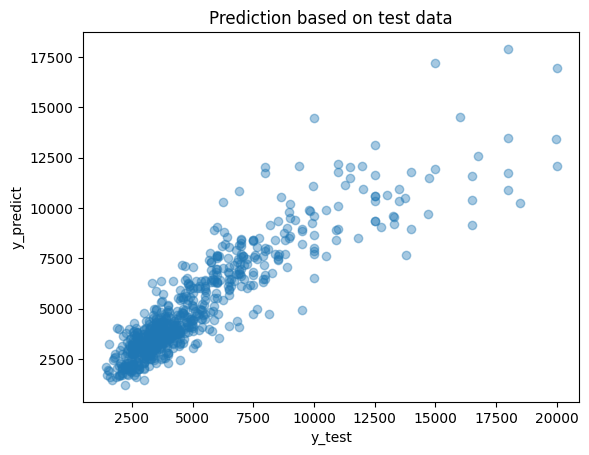

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df3 = pd.DataFrame(streeteasy)

x = df3[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df3[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

# Create a scatter plot
plt.scatter(y_test, y_predict, alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("y_test")
plt.ylabel("y_predict")

# Create a title
plt.title("Prediction based on test data")

# Show the plot
plt.show()


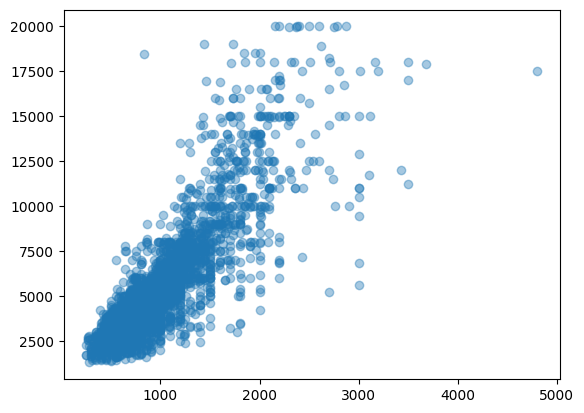

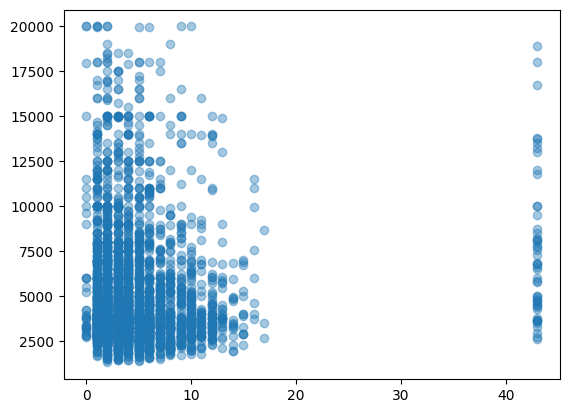

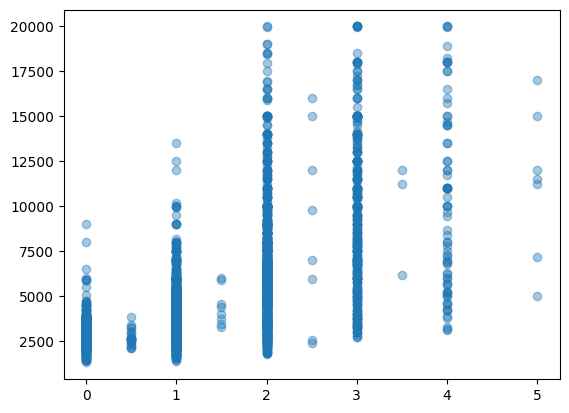

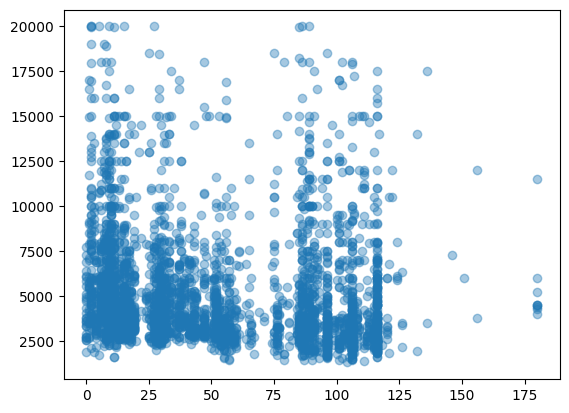

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

# Input code here:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.show()
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.show()
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

Machine Learning Pipelines
Data Cleaning (Numeric)
24 min
To introduce pipelines, let’s look at a common set of data cleaning/EDA tasks — dealing with missing values and scaling numeric
Preview: Docs Loading link description
variables
. We’re going to convert an existing code base that performs these tasks to more concise code that uses scikit-learn‘s Pipeline using the following steps.

First, to define a pipeline, we pass a list of tuples of the form (name, transform/estimator) into a Pipeline object. For example, if we wanted to perform imputation with a SimpleImputer first, and scale our numerical variables with a StandardScaler next, the code would look as follows:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("imputer",SimpleImputer()), ("scale",StandardScaler())])


Once a Pipeline object has been instantiated, the methods .fit and .transform can be called like we would with any data transformation object in scikit-learn.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)
pipeline.fit(x_train)
pipeline.transform(x_test)


If the pipeline includes a
Preview: Docs Loading link description
machine learning
 model as well,.predict can also be called down the line. Each step in the pipeline will be fit in the order provided. Further parameters can be passed to each step as well. For example, if we want to pass the
Preview: Docs Loading link description
parameter
 with_mean=False to the StandardScaler, we’d use:

Pipeline([("imputer",SimpleImputer()), ("scale",StandardScaler(with_mean=False))])


In the
Preview: Docs Loading link description
code editor
, we’ve loaded a dataset from the UCI Machine Learning repository containing information about different attributes of abalones, typically used to predict the age of the abalone. We’ve defined the predictor and target variables, identified the numerical and categorical columns, added some missing values to impute, and performed a train-test split.

Instructions
Checkpoint 1 Passed
1.
Examine the existing code that fills in missing values with the mean value (using a SimpleImputer) and then scales the data (using StandardScaler). Rewrite this code to create pipeline, a Pipeline object using the sample code given in the narrative.

Checkpoint 2 Passed
2.
Fit the pipeline to the numerical columns of the training data. Transform the test data (numeric columns only) using the fit pipeline and call this object x_transform.

Checkpoint 3 Passed
3.
To see if x_transform and x_test_fill_missing_scale are equal, use the np.array_equal() function. The arrays will be the two arguments inside this function. Then save the results to the variable array_diff. If the arrays are equal then np.array_equal() returns True.

Print array_diff to see if this is indeed the case.

Checkpoint 4 Passed
4.
Define a new pipeline, pipeline_median with the imputer strategy parameter set to median.

Checkpoint 5 Passed
5.
To compare the results between the two pipelines, implement the following steps:

Fit the numerical training data with pipeline_median and transform the numerical test data to obtain a new array, x_transform_median.
Calculate new_array_diff, the sum of the absolute differences between the two arrays, x_transform and x_transform_median.
Print new_array_diff to confirm that the results between the pipelines are indeed different!

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Loading the dataset
columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df4 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)
## Defining target and predictor variables
y = df4.age
X = df4.drop(columns=['age'])

## Numerical columns:
num_cols = X.select_dtypes(include=np.number).columns
## Categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

## Create some missing values
for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

## Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

#####-------Imputation and Scaling: Code base to transform -----------------#####
## Numerical training data
x_train_num = x_train[num_cols]
# Filling in missing values with mean on numeric features only
x_train_fill_missing = x_train_num.fillna(x_train_num.mean())
## Fitting standard scaler on x_train_fill_missing
scale = StandardScaler().fit(x_train_fill_missing)
## Scaling data after filling in missing values
x_train_fill_missing_scale = scale.transform(x_train_fill_missing)
## Same steps as above, but on the test set:
x_test_fill_missing = x_test[num_cols].fillna(x_train_num.mean())
x_test_fill_missing_scale = scale.transform(x_test_fill_missing)
#####-------Imputation and Scaling: Code base to transform -----------------#####

#1. Rewrite using Pipelines!
pipeline = Pipeline([("imputer",SimpleImputer(strategy='mean')), ("scale",StandardScaler())])

#2. Fit pipeline on the test and compare results
pipeline.fit(x_train[num_cols])
x_transform = pipeline.transform(x_test[num_cols])

# 3. Verify pipeline transform test set is the same by using np.array_equal()
array_diff= np.array_equal(x_transform,x_test_fill_missing_scale)
print(array_diff)

#4. Change imputer strategy to median
pipeline_median =Pipeline([("imputer",SimpleImputer(strategy='median')), ("scale",StandardScaler())])
pipeline_median.fit(x_train[num_cols])

# 5 Compare results between the two pipelines
x_transform_median = pipeline_median.transform(x_test[num_cols])
new_array_diff = abs(x_transform-x_transform_median).sum()
print(new_array_diff)

True
46.05278297311281


Machine Learning Pipelines
Data Cleaning (Categorical)
13 min
We’re now going to implement a task similar to the previous exercise with pipeline.Pipeline(), but with categorical
Preview: Docs Loading link description
variables
 now. Specifically, we’ll be dealing with missing values in categorical data and one-hot-encoding categorical variables. We will convert an existing codebase to a pipeline like in the previous exercise. The two steps in detail are:

SimpleImputer() will be used again to fill missing values in the pipeline, but this time, the strategy
Preview: Docs Loading link description
parameter
 will need to be updated to most_frequent.
OneHotEncoder() will be used as the second step in the pipeline. The default setting in scikit-learn‘s OneHotEncoder() is that a sparse
Preview: Docs Loading link description
array
 will be returned from this transform, so we will use sparse='False' to return a full array.
Instructions
Checkpoint 1 Passed
1.
Examine the existing code that fills in missing values with the mode of the categorical variable and then creates dummy variables (with OneHotEncoder). Create a Pipeline() object named pipeline that will do the same tasks by making:

The first step in the a pipeline a SimpleImputer() that employs the most_frequent strategy
The second step in the pipeline a OneHotEncoder() with arguments drop = 'first' and sparse = False
Checkpoint 2 Passed
2.
First, fit this pipeline to the training data with categorical columns alone. You can index the categorical data with x_train[cat_cols] since the categorical columns were already saved as cat_cols.

Next, transform the test data (categorical columns only) and call the resulting array, x_transform.

Checkpoint 3 Passed
3.
To see if x_transform and x_test_fill_missing_ohe are equal, use the np.array_equal() function. The arrays will be the two arguments inside this function. Then save the results to the variable check_arrays. If the arrays are equal then np.array_equal() returns True.

Print check_arrays to see if this is indeed the case.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

y = df.age
X=df.drop(columns=['age'])
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=['object']).columns
#create some missing values
for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)
x_train_cat = x_train[cat_cols]
#fill missing values with mode on categorical features only
x_train_fill_missing = x_train_cat.fillna(x_train_cat.mode().values[0][0])
#apply one hot encoding on x_train_fill_missing
ohe = OneHotEncoder(sparse_output=False, drop='first').fit(x_train_fill_missing)
#transform data after filling in missing values
x_train_fill_missing_ohe = ohe.transform(x_train_fill_missing)

#Now want to do the same thing on the test set!
x_test_fill_missing = x_test[cat_cols].fillna(x_train_cat.mode().values[0][0])
x_test_fill_missing_ohe = ohe.transform(x_test_fill_missing)

#1. Rewrite using Pipelines!
pipeline = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')), ("ohe",OneHotEncoder(sparse_output=False, drop='first'))])


#2. Fit the pipeline and transform the test data (categorical columns only!)
pipeline.fit(x_train[cat_cols])
x_transform = pipeline.transform(x_test[cat_cols])

#3. Check if the two arrays are the same using np.array_equal()
check_arrays = np.array_equal(x_transform,x_test_fill_missing_ohe)
print('Are the arrays equal?')
print(check_arrays)


Are the arrays equal?
True


Machine Learning Pipelines
Column Transformer
13 min
Often times, you may not want to simply apply every function to all columns. If our columns are of different types, we may only want to apply certain parts of the pipeline to a subset of columns. This is what we saw in the two previous exercises. One set of transformations are applied to numeric columns and another set to the categorical ones. We can use scikit-learn‘s ColumnTransformer as one way of combining these processes together.

ColumnTransformer takes in a list of tuples of the form (name, pipeline, columns):

example_column_transformer = ColumnTransformer(
    transformers=[ ("name_1", pipeline_1, columns_1),
                   ("name_2", pipeline_2, columns_2)])


The transformer can be anything with a .fit and .transform
Preview: Docs Loading link description
method
 like we used previously (like SimpleImputer or StandardScaler), but can also itself be a pipeline, as we will use in the exercise.

Instructions
Checkpoint 1 Passed
1.
Following what we did in the previous exercise, we’re going to create two pipelines, one for the numerical preprocessing and another for the categorical preprocessing. First, create a numerical preprocessing pipeline, num_vals pipeline that has:

a SimpleImputer() named 'imputer' with imputing strategy set to 'mean'
a StandardScaler() named 'scale'
Checkpoint 2 Passed
2.
Now, create a pipeline for categorical preprocessing called cat_vals. This pipeline should have

a SimpleImputer() named 'imputer' with an imputing strategy set to 'most_frequent'
a OneHotEncoder() named 'ohe', with arguments sparse = False and drop = 'first'
Checkpoint 3 Passed
3.
Similar to the sample code in the narrative, create a ColumnTransformer named preprocess that takes the two pipelines you’ve defined, num_vals and cat_vals, as transformers and then names them as num_preprocess and cat_preprocess respectively.

Checkpoint 4 Passed
4.
Fit the transformer on the training set, transform the test data and store the transformed test data as x_transform.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

y = df.age
X=df.drop(columns=['age'])
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=['object']).columns
#create some missing values
for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

#1. Create a pipeline `num_vals` to process numerical data

num_vals = Pipeline([("imputer",SimpleImputer()), ("scale",StandardScaler())])

#2. Create a pipeline `cat_vals` to process categorical data
cat_vals = Pipeline([("imputer",SimpleImputer(strategy = 'most_frequent')), ("ohe",OneHotEncoder(drop = 'first', sparse_output = False))])


#3. Create a column transformer, `preprocess` with the numerical and categorical pipelines
preprocess = ColumnTransformer(
    transformers=[
        ("num_preprocess", num_vals, num_cols),
        ("cat_preprocess", cat_vals, cat_cols)
    ]
)


#4. Fit the preprocess transformer to training data
preprocess.fit(x_train)
#Transform the test data
x_transform = preprocess.transform(x_test)





Adding a Model
11 min
Great! Now that we have all the preprocessing done and coded succinctly using ColumnTransformer and Pipeline, we can add a model. We will take the result at the end of the previous exercise, and now create a final pipeline with the ColumnTransformer as the first step, and a LinearRegression() model as the second step.

By adding a model to the final step, the last step no longer has a .transform
Preview: Docs Loading link description
method
. This is the only step in a pipeline that can be a non-transformer. But now the final step also has a .predict method, which can be called on the entire pipeline! Additionally the .score() method, which estimates the default prediction score on any scikit-learn model can also be used to evaluate the performance of the pipeline.

Instructions
Checkpoint 1 Passed
1.
We’ve preloaded all the code from the previous exercise. Create a new pipeline named pipeline that has the column transformer preprocess as the first component and then a LinearRegression() model, regr as the second.

Checkpoint 2 Passed
2.
Fit the pipeline on the training data and use the .predict method to obtain the predictions on the test data. Store these predictions in an array named y_pred.

Checkpoint 3 Passed
3.
The properties of the last component of a pipeline transfer over to the pipeline object. We’ve seen how when the last component is a model, then, characteristics of scikit-learn models such as .fit() and .predict() transfer over. Similarly, .score() which gives the default scoring metric of a model can also be accessed via the pipeline!

The default scoring metric for a Linear Regression model in scikit-learn is the R^2 score. We can now use the .score() method to evaluate the predictions made. Calculate this score and store it as pipeline_score.

We’ve also written some code that calculates the R^2 value using the usual method. Uncomment the lines pertaining to this.
Write a print statement to print the pipeline_score and press Run to check if both these methods give the same value.

In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

y = df.age
X=df.drop(columns=['age'])
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=['object']).columns
#create some missing values
for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

cat_vals = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')), ("ohe",OneHotEncoder(sparse_output=False, drop='first'))])

num_vals = Pipeline([("imputer",SimpleImputer(strategy='mean')), ("scale",StandardScaler())])

preprocess = ColumnTransformer(
    transformers=[
        ("cat_process", cat_vals, cat_cols),
        ("num_process", num_vals, num_cols)
    ]
)
#1. Create a pipeline with `preprocess` and a linear regression model, `regr`
pipeline = Pipeline([("preprocess",preprocess),
                     ("regr",LinearRegression())])

#2. Fit the pipeline on the training data and predict on the test data

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

#3. Calculate pipeline score and compare to estimator score
#Pipeline score
pipeline_score = pipeline.score(x_test,y_test)
print(pipeline_score)

#r-squared score
r2_score = r2_score(y_test, y_pred)
print(r2_score)


0.5210532599297512
0.5210532599297512


Hyperparameter Tuning
8 min
Great, we have a very condensed bit of code that does all our data cleaning, preprocessing, and modeling in a reusable fashion! What now? Well, we can tune some of the parameters of the model by applying a grid search over a range of hyperparameter values.

A linear regression model has very few hyperparameters and here we’ll be using the hyperparameter that pertains to whether we include an intercept or not. As we’ve aseen, the pipeline created in the previous exercise is an estimator and we can call the .fit() and .predict() methods on it. So in fact, the whole pipeline can be passed as an estimator for GridSearchCV. This will then refit the pipeline for each combination of
Preview: Docs Loading link description
parameter
 values in the grid and each fold in the cross-validation split.

That’s a lot – but the code is again very short. One last thing to keep in mind while referencing hyperparameters in a pipeline is the following: any hyperparameter can be called using pipeline_step_name + '__' + hyperparameter. For example, regr__fit_intercept corresponds to a pipeline step named “regr” and the hyperparameter “fit_intercept”. Let’s see how this all works, shall we?

Note: If you’d like a refresher on how hyperparameters can be tuned check out our lesson on the same.

Instructions
Checkpoint 1 Passed
1.
We’ve preloaded all the code from the previous exercise once again. Using the the previously built pipeline as an input define a GridSearchCV object named gs with the following arguments:

Set scoring to 'neg_mean_squared_error'
Set number of cross-validation folds, cv to 5
Checkpoint 2 Passed
2.
Fit the grid search model gs to the training data. We can now call the GridSearchCV attributes like usual.

Calculate the best score among the parameters in the grid and store it as best_score.
Calculate optimal parameters from the grid search and store it as best_params.
Print both to examine if it’s best to fit an intercept to the regression model here or not!

In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import metrics

columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

y = df.age
X=df.drop(columns=['age'])
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=['object']).columns
#create some missing values
for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

cat_vals = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')), ("ohe",OneHotEncoder(sparse_output=False, drop='first'))])
num_vals = Pipeline([("imputer",SimpleImputer(strategy='mean')), ("scale",StandardScaler())])

preprocess = ColumnTransformer(
    transformers=[
        ("cat_process", cat_vals, cat_cols),
        ("num_process", num_vals, num_cols)
    ]
)

#Create a pipeline with pregrocess and a linear regression model
pipeline = Pipeline([("preprocess",preprocess),
                     ("regr",LinearRegression())])

#Very simple parameter grid, with and without the intercept
param_grid = {
    "regr__fit_intercept": [True,False]
}

#------------------------------------------------
#1. Grid search using previous pipeline
gs = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)

#2. fit grid using training data and print best score
gs.fit(x_train, y_train)
best_score = gs.best_score_
best_params = gs.best_params_
print(best_score, best_params)




-5.514658955388594 {'regr__fit_intercept': True}


Final Pipeline
19 min
Way to go! Now that we are getting the hang of pipelines, we’re going take things up a notch. We will now be searching over different types of models, each having their own sets of hyperparameters! In the original pipeline, we defined regr to be an instance of LinearRegression(). Then in defining the
Preview: Docs A parameter is the name of a variable passed into a function. Parameters allow functions to accept inputs. An argument, on the other hand, is the actual value of the variable (also known as the parameter) passed into a function. Suppose we have a function called tripleThis(): js function tripleThis(x) { return x * 3; } tripleThis(6);
parameter
 grid to search over, we used the
Preview: Docs Loading link description
dictionary
 {"regr__fit_intercept": [True,False]} to define the values of the fit_intercept term. We can equivalently do this by passing both the estimator AND parameters in a single dictionary as

{'regr': [LinearRegression()], "regr__fit_intercept": [True,False]}


We can add more models to it as follows. Suppose we wanted to add a Ridge regression model and also perform hyperparamter tuning using GridSearchCV to find the best regularization parameter alpha, we would add it to previous dictionary to create an
Preview: Docs Loading link description
array
 of dictionaries as follows:

search_space = [{'regr': [LinearRegression()], 'regr__fit_intercept': [True,False]},
                {'regr':[Ridge()], 'regr__alpha': [0,0.1,1,10,100]}


Note: If you’d like a refresher on regularization using hyperparameter tuning in regression models, check out our article and lesson on the same.

The goal of this process is to find the best estimator for our dataset and problem in the most efficient manner possible. The pipeline module allows us to do exactly that! In a couple of lines of code, we’re able to preprocess the data and search an entire model and hyperparameter space. The final step is to access the pipeline elements to draw out the information about which estimator and hyperparameter set gets us the best score. We do this by using the .next_steps
Preview: Docs Loading link description
method
 by using the strings we’ve used in the dictionary. For instance, the regression model can be access using the
Preview: Docs Loading link description
string
 'regr' from the dictionary as follows:

Get the best estimator using GridSearchCV‘s .best_estimator_ method
Use .named_steps['regr'].get_params() on the best estimator to get its hyperparameters!
Instructions
Checkpoint 1 Passed
1.
Let’s try this! First, update the search_space array of dictionaries from the narrative to add a Lasso Regression model as the third dictionary as follows:

Use 'regr' for all three regression models
Use the key 'regr__alpha' to refer to the regularization parameter alpha for both Ridge and Lasso
Set the array of alpha‘s to search over the array[0.01,0.1,1,10,100] for both Ridge and Lasso
Checkpoint 2 Passed
2.
Like in the previous exercise, define a GridSearchCV object named gs with pipeline as its first argument followed by the following arguments:

Set param_grid to search_space
Set scoring to ‘neg_mean_squared_error’
Set number of cross-validation folds, cv to 5
Checkpoint 3 Passed
3.
We’re now going to get the best pipeline, the regression model associated with it and the hyperparameters of this model as follows:

Fit the grid search to the training data.
Use the .best_estimator_ attribute to get the best pipeline from the grid search and store it as best_pipeline.
Use .named_steps['regr'] on best_pipeline to get the best regression model. Store it as best_regression_model and print it.
Use get_params() to get the hyperparameters of best_regression_model. Store it as best_model_hyperparameters and print it.
Checkpoint 4 Passed
4.
We can now similarly access the hyperparameters of the preprocessing part of the pipeline as well! Access the hyperparameters of the imputer in the preprocessing step for categorical data by accessing the named step preprocess, and then the named transformer cat_preprocess, and then the named step imputer.

Store it as cat_preprocess_hyperparameters and print it.

In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import metrics

columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

y = df.age
X=df.drop(columns=['age'])
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=['object']).columns
#create some missing values
for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

cat_vals = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')), ("ohe",OneHotEncoder(sparse_output=False, drop='first'))])
num_vals = Pipeline([("imputer",SimpleImputer(strategy='mean')), ("scale",StandardScaler())])

preprocess = ColumnTransformer(
    transformers=[
        ("cat_preprocess", cat_vals, cat_cols),
        ("num_preprocess", num_vals, num_cols)
    ]
)
#Create a pipeline with preprocess and a linear regression model
pipeline = Pipeline([("preprocess",preprocess),
                     ("regr",LinearRegression())])

#--------------------------------------
# 1. Update the `search_space` array from the narrative to add a Lasso Regression model as the third dictionary.
search_space = [{'regr': [LinearRegression()], 'regr__fit_intercept': [True,False]},
                {'regr':[Ridge()],
                     'regr__alpha': [0.01,0.1,1,10,100]},
                {'regr':[Lasso()],
                     'regr__alpha': [0.01,0.1,1,10,100]}]


# 2.  Initialize a grid search on `search_space`
gs = GridSearchCV(pipeline, search_space, scoring='neg_mean_squared_error', cv=5)

#3. Find the best pipeline, regression model and its hyperparameters

## i. Fit to training data
gs.fit(x_train, y_train)

## ii. Find the best pipeline
best_pipeline = gs.best_estimator_

## iii. Find the best regression model
best_regression_model = best_pipeline.named_steps['regr']
print('The best regression model is:')
print(best_regression_model)

## iv. Find the hyperparameters of the best regression model
best_model_hyperparameters = best_regression_model.get_params()
print('The hyperparameters of the regression model are:')
print(best_model_hyperparameters)

#4. Access the hyperparameters of the categorical preprocessing step
cat_preprocess_hyperparameters = best_pipeline.named_steps['preprocess'].named_transformers_['cat_preprocess'].named_steps['imputer'].get_params()
print('The hyperparameters of the imputer are:')
print(cat_preprocess_hyperparameters)


The best regression model is:
Ridge(alpha=1)
The hyperparameters of the regression model are:
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
The hyperparameters of the imputer are:
{'add_indicator': False, 'copy': True, 'fill_value': None, 'keep_empty_features': False, 'missing_values': nan, 'strategy': 'most_frequent'}


Machine Learning Pipelines
Writing Custom Classes & Summary
8 min
While scikit-learn contains many existing transformers and classes that can be used in pipelines, you may need at some point to create your own. This is simpler than you may think, as a step in the pipeline needs to have only a few methods implemented. If it is an intermediate step, it will need fit and transform methods. We will implement all of this in the exercise below!

Here are some of the major takeaways on building pipelines in scikit-learn:

Pipelines help make concise, reproducible, code by combining steps of transformers and/or a final estimator.

Intermediate steps of a pipeline must have both the .fit() and .transform() methods. This includes preprocessing, imputation, feature selection, dimension reduction.

The final step of a pipeline must have the .fit()
Preview: Docs A method is a small piece of code, usually defined in a class, that can be used outside the class and in other parts of the program.
method
 – this can include a transformer or an estimator/model.

If the pipeline is meant to only transform your data by combining preprocessing and data cleaning steps, then each step in the pipeline will be a transformer. If your pipeline will also include a model (a final estimation or prediction step), then the last step must be an estimator.

Once the steps of a pipeline are defined, it can be used like an other transformer/estimator by calling fit, transform, and/or predict methods. Similarly, it can be used in place of an estimator in a hyperparameter grid search.

Instructions
Checkpoint 1 Passed
1.
Examine the code written for the class MyImputer. This replicates the SimpleImputer using the mean strategy. Notice both fit and transform methods are defined. Use this new class as the first step in new_pipeline and second step StandardScaler.

Checkpoint 2 Passed
2.
Fit the new pipeline on the training data, numeric columns only. This will be identical to the pipeline created in exercise 2. Verify this by performing the following steps:

Transform the test set x_test[num_cols] using this and write it to a new variable x_transform.
To compare x_transform and x_test_fill_missing_scale, use np.array_equal() to a variable check_arrays and print it.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)
y = df.age
X=df.drop(columns=['age'])
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=['object']).columns

for i in range(1000):
    X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)
x_train_num = x_train[num_cols]
#fill missing values with mean on numeric features only
x_train_fill_missing = x_train_num.fillna(x_train_num.mean())
#fit standard scaler on x_train_fill_missing
scale = StandardScaler().fit(x_train_fill_missing)
#scale data after filling in missing values
x_train_fill_missing_scale = scale.transform(x_train_fill_missing)
x_test_fill_missing = x_test[num_cols].fillna(x_train_num.mean())
x_test_fill_missing_scale = scale.transform(x_test_fill_missing)

class MyImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y = None):
        self.means = np.mean(X, axis=0)    # calculate the mean of each column
        return self

    def transform(self, X, y = None):
        #transform method fills in missing values with means using pandas
        return X.fillna(self.means)

#1. Create new pipeline using the custom class MyImputer as the first step and standard scaler on the second
new_pipeline = Pipeline([("imputer",MyImputer()), ("scale",StandardScaler())])

#2. 1.Fit new pipeline on the training data with num_cols only
new_pipeline.fit(x_train[num_cols])
x_transform = new_pipeline.transform(x_test[num_cols])

#2 2. Verify that the results of the transform are the same on test set
check_arrays = np.array_equal(x_transform, x_test_fill_missing_scale)
print(check_arrays)





True


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.io import arff
import urllib.request # Import the necessary library
import io # Import io module for text stream handling

# Fetch raw data from the URL
url = "https://raw.githubusercontent.com/adaa-polsl/RuleKit/refs/heads/master/data/bone-marrow-uci.arff"
with urllib.request.urlopen(url) as response: # Open the URL
    # Decode the response content to a string using UTF-8
    data_str = response.read().decode('utf-8')
    # Create a text stream from the decoded string
    text_stream = io.StringIO(data_str)
    # Load the ARFF data from the text stream
    data = arff.loadarff(text_stream)

df = pd.DataFrame(data[0])

# 1. Calculate the number of unique values for each column
print("Count of unique values in each column:")
print(df.nunique())

# 2. Set target ('survival_status') as y; features (excluding 'survival_status' and 'time') as X
# Convert the target to int type to resolve error
y = df['survival_status'].astype(int)
X = df.drop(columns=['survival_status', 'time'], errors='ignore')

# Convert all columns to numeric, coerce errors to null values
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors='coerce')

# Ensure binary columns are encoded as 0 and 1
for c in X.columns[X.nunique() == 2]:
    X[c] = (X[c] == 1) * 1.0

# 3. Define lists of numeric and categorical columns based on the number of unique values
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 4. Print columns with missing values
print("\nColumns with missing values:")
print(X.isnull().sum()[X.isnull().sum() > 0])

# 5. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# 6. Create categorical preprocessing pipeline (mode imputation + One-Hot Encoding)
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# 7. Create numerical preprocessing pipeline (mean imputation + standard scaling)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 8. Create column transformer to preprocess numerical and categorical features separately
preprocessor = ColumnTransformer([
    ("num_preprocess", num_pipeline, num_cols),
    ("cat_preprocess", cat_pipeline, cat_cols)
])

# 9. Create a pipeline with preprocessing, PCA, and logistic regression
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=5)),  # Reduce dimensions
    ("classifier", LogisticRegression(max_iter=1000))
])

# 10. Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline on the test data
y_pred = pipeline.predict(X_test)

# 11. Define search space of hyperparameters
param_grid = {
    "pca__n_components": [5, 10, 15],  # Testing different PCA components
    "classifier__C": [0.01, 0.1, 1, 10],  # Regularization strength for logistic regression
    "classifier__solver": ["liblinear", "lbfgs"]  # Different solvers
}

# 12. Search over hyperparameters to optimize pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# 13. Save the best estimator and print attributes
best_model = grid_search.best_estimator_
print("\nBest Model Found:\n", best_model)

# 14. Print attributes of best_model
print("\nBest Hyperparameters:\n", grid_search.best_params_)

# 15. Print final accuracy score
y_best_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_best_pred)
print("\nFinal Accuracy Score:", final_accuracy)

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_best_pred))

Count of unique values in each column:
donor_age                    187
donor_age_below_35             2
donor_ABO                      4
donor_CMV                      3
recipient_age                125
recipient_age_below_10         2
recipient_age_int              3
recipient_gender               2
recipient_body_mass          130
recipient_ABO                  5
recipient_rh                   3
recipient_CMV                  3
disease                        5
disease_group                  2
gender_match                   2
ABO_match                      3
CMV_status                     5
HLA_match                      4
HLA_mismatch                   2
antigen                        5
allel                          6
HLA_group_1                    7
risk_group                     2
stem_cell_source               2
tx_post_relapse                2
CD34_x1e6_per_kg             183
CD3_x1e8_per_kg              163
CD3_to_CD34_ratio            182
ANC_recovery                  18
PLT_

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['donor_age_below_35' 'donor_CMV' 'recipient_age_below_10'
 'recipient_age_int' 'recipient_gender' 'recipient_rh' 'recipient_CMV'
 'disease' 'disease_group' 'gender_match' 'ABO_match' 'HLA_match'
 'HLA_mismatch' 'HLA_group_1' 'risk_group' 'stem_cell_source'
 'tx_post_relapse' 'acute_GvHD_II_III_IV' 'acute_GvHD_III_IV'
 'extensive_chronic_GvHD' 'relapse']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['donor_age_below_35' 'donor_CMV' 'recipient_age_below_10'
 'recipient_age_int' 'recipient_gender' 'recipient_rh' 'recipient_CMV'
 'disease' 'disease_group' 'gender_match' 'ABO_match' 'HLA_match'
 'HLA_mismatch' 'HLA_group_1' 'risk_group' 'stem_cell_source'
 'tx_post_relapse' 'acute_GvHD_


Best Model Found:
 Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh'...
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time'],
      dtype='object')),
                                                 ('cat_preprocess',
                                                  Pipeline(steps=[('imputer',
    

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['donor_age_below_35' 'donor_CMV' 'recipient_age_below_10'
 'recipient_age_int' 'recipient_gender' 'recipient_rh' 'recipient_CMV'
 'disease' 'disease_group' 'gender_match' 'ABO_match' 'HLA_match'
 'HLA_mismatch' 'HLA_group_1' 'risk_group' 'stem_cell_source'
 'tx_post_relapse' 'acute_GvHD_II_III_IV' 'acute_GvHD_III_IV'
 'extensive_chronic_GvHD' 'relapse']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['donor_age_below_35' 'donor_CMV' 'recipient_age_below_10'
 'recipient_age_int' 'recipient_gender' 'recipient_rh' 'recipient_CMV'
 'disease' 'disease_group' 'gender_match' 'ABO_match' 'HLA_match'
 'HLA_mismatch' 'HLA_group_1' 'risk_group' 'stem_cell_source'
 'tx_post_relapse' 'acute_GvHD_

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.io import arff
import urllib.request
import io

# For Optuna Bayesian Optimization
!pip install optuna
import optuna

# ------------------------------
# Data Loading & Preprocessing
# ------------------------------

# Fetch raw data from the URL
url = "https://raw.githubusercontent.com/adaa-polsl/RuleKit/refs/heads/master/data/bone-marrow-uci.arff"
with urllib.request.urlopen(url) as response:
    data_str = response.read().decode('utf-8')
    text_stream = io.StringIO(data_str)
    data = arff.loadarff(text_stream)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.9 MB/s eta 0:00:00


In [ ]:
df = pd.DataFrame(data[0])
df.head(3)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,b'yes',b'A',b'present',9.6,b'yes',b'5_10',b'male',35.0,b'A',...,1.338760,19.0,51.0,b'yes',b'yes',32.0,b'no',b'no',999.0,b'0'
1,23.342466,b'yes',b'B',b'absent',4.0,b'yes',b'0_5',b'male',20.6,b'B',...,11.078295,16.0,37.0,b'yes',b'no',1000000.0,b'no',b'yes',163.0,b'1'
2,26.394521,b'yes',b'B',b'absent',6.6,b'yes',b'5_10',b'male',23.4,b'B',...,19.013230,23.0,20.0,b'yes',b'no',1000000.0,b'no',b'yes',435.0,b'1'


In [ ]:
# 1. Calculate the number of unique values for each column
print("Count of unique values in each column:")
print(df.nunique())


Count of unique values in each column:
donor_age                    187
donor_age_below_35             2
donor_ABO                      4
donor_CMV                      3
recipient_age                125
recipient_age_below_10         2
recipient_age_int              3
recipient_gender               2
recipient_body_mass          130
recipient_ABO                  5
recipient_rh                   3
recipient_CMV                  3
disease                        5
disease_group                  2
gender_match                   2
ABO_match                      3
CMV_status                     5
HLA_match                      4
HLA_mismatch                   2
antigen                        5
allel                          6
HLA_group_1                    7
risk_group                     2
stem_cell_source               2
tx_post_relapse                2
CD34_x1e6_per_kg             183
CD3_x1e8_per_kg              163
CD3_to_CD34_ratio            182
ANC_recovery                  18
PLT_

In [ ]:
# 2. Set target ('survival_status') as y; features (excluding 'survival_status' and 'time') as X
y = df['survival_status'].astype(int)
X = df.drop(columns=['survival_status', 'time'], errors='ignore')

# Convert all columns to numeric, coerce errors to null values
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors='coerce')

# **Drop columns that have all missing values**
X = X.dropna(axis=1, how='all')

# Ensure binary columns are encoded as 0 and 1
for c in X.columns[X.nunique() == 2]:
    X[c] = (X[c] == 1) * 1.0

In [ ]:
# 3. Define lists of numeric and categorical columns based on the number of unique values
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# 4. Print columns with missing values
print("\nColumns with missing values:")
print(X.isnull().sum()[X.isnull().sum() > 0])


Columns with missing values:
donor_ABO              114
recipient_body_mass      2
recipient_ABO          139
CMV_status              16
antigen                  1
allel                    1
CD3_x1e8_per_kg          5
CD3_to_CD34_ratio        5
dtype: int64


In [ ]:
# 5. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
# 6. Create categorical preprocessing pipeline (mode imputation + One-Hot Encoding)
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# 7. Create numerical preprocessing pipeline (mean imputation + standard scaling)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 8. Create column transformer to preprocess numerical and categorical features separately
preprocessor = ColumnTransformer([
    ("num_preprocess", num_pipeline, num_cols),
    ("cat_preprocess", cat_pipeline, cat_cols)
])

# 9. Create a pipeline with preprocessing, PCA, and logistic regression
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=5)),  # initial number of components
    ("classifier", LogisticRegression(max_iter=1000))
])


In [ ]:
# ------------------------------
# Grid Search Hyperparameter Tuning
# ------------------------------

# 10. Fit the pipeline on the training data (for initial reference)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("\nInitial Pipeline Accuracy:", accuracy_score(y_test, y_pred))



Initial Pipeline Accuracy: 0.8936170212765957


In [ ]:

# 11. Define search space of hyperparameters for GridSearchCV
param_grid = {
    "pca__n_components": [5, 10, 15],
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__solver": ["liblinear", "lbfgs"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_preprocess',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['donor_age', 'donor_ABO', 'recipient_age', 'recipient_body_mass',
       'recipient_ABO', 'CMV_status', 'antigen', 'allel', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ra...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index([], dtype='object'))])),
                                       ('pca', PCA(n_components=15)),
                                       ('classifier',
                                        LogisticRegression(C=5.8143953565938125,
                                                           max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__solver': ['liblinear', 'lbfgs'],
                         'pca__n_components': [5, 10, 15]},
             scoring='accuracy')

In [ ]:

best_model_grid = grid_search.best_estimator_
print("\n[GridSearchCV] Best Model Found:\n", best_model_grid)
print("[GridSearchCV] Best Hyperparameters:\n", grid_search.best_params_)



[GridSearchCV] Best Model Found:
 Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['donor_age', 'donor_ABO', 'recipient_age', 'recipient_body_mass',
       'recipient_ABO', 'CMV_status', 'antigen', 'allel', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'time_to_acute_GvHD_III_IV', 'survival_time'],
      dtype='object')),
                                                 ('cat_preprocess',
                                                  Pipeline(steps=[('imputer',
                                  

In [ ]:

y_best_pred_grid = best_model_grid.predict(X_test)
final_accuracy_grid = accuracy_score(y_test, y_best_pred_grid)
print("[GridSearchCV] Final Accuracy Score:", final_accuracy_grid)
print("[GridSearchCV] Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred_grid))



[GridSearchCV] Final Accuracy Score: 0.8936170212765957
[GridSearchCV] Confusion Matrix:
 [[25  2]
 [ 3 17]]


In [ ]:
# ------------------------------
# Optuna (Bayesian Optimization)
# ------------------------------

def objective(trial):
    # Suggest hyperparameters
    n_components = trial.suggest_int("pca__n_components", 5, 15)
    C = trial.suggest_float("classifier__C", 0.01, 10, log=True)
    solver = trial.suggest_categorical("classifier__solver", ["liblinear", "lbfgs"])

    # Update the pipeline with these hyperparameters
    pipeline.set_params(
        pca__n_components=n_components,
        classifier__C=C,
        classifier__solver=solver
    )

    # Evaluate with 5-fold cross-validation on the training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("\n[Optuna] Best Trial:")
print("  Value (CV Accuracy):", study.best_trial.value)
print("  Best Hyperparameters:", study.best_trial.params)


[I 2025-03-29 12:36:05,330] A new study created in memory with name: no-name-5b74caa1-4853-4ed8-ad57-cabbf19ca611
[I 2025-03-29 12:36:05,498] Trial 0 finished with value: 0.8642857142857144 and parameters: {'pca__n_components': 7, 'classifier__C': 3.008919545006382, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.8642857142857144.
[I 2025-03-29 12:36:05,728] Trial 1 finished with value: 0.9 and parameters: {'pca__n_components': 12, 'classifier__C': 0.19361866651762621, 'classifier__solver': 'lbfgs'}. Best is trial 1 with value: 0.9.
[I 2025-03-29 12:36:05,954] Trial 2 finished with value: 0.8928571428571429 and parameters: {'pca__n_components': 11, 'classifier__C': 3.384828873464704, 'classifier__solver': 'lbfgs'}. Best is trial 1 with value: 0.9.
[I 2025-03-29 12:36:06,138] Trial 3 finished with value: 0.9071428571428571 and parameters: {'pca__n_components': 10, 'classifier__C': 2.6605162451507027, 'classifier__solver': 'lbfgs'}. Best is trial 3 with value: 0.9071428


[Optuna] Best Trial:
  Value (CV Accuracy): 0.9214285714285714
  Best Hyperparameters: {'pca__n_components': 15, 'classifier__C': 5.8143953565938125, 'classifier__solver': 'liblinear'}


In [ ]:
# Set pipeline to best parameters found by Optuna and evaluate on test set
pipeline.set_params(
    pca__n_components=study.best_trial.params["pca__n_components"],
    classifier__C=study.best_trial.params["classifier__C"],
    classifier__solver=study.best_trial.params["classifier__solver"]
)
pipeline.fit(X_train, y_train)
y_best_pred_optuna = pipeline.predict(X_test)
final_accuracy_optuna = accuracy_score(y_test, y_best_pred_optuna)
print("\n[Optuna] Final Accuracy Score:", final_accuracy_optuna)
print("[Optuna] Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred_optuna))



[Optuna] Final Accuracy Score: 0.8936170212765957
[Optuna] Confusion Matrix:
 [[25  2]
 [ 3 17]]


You go to measure several circles you happen to find around.

A medium pizza that is 12 inches across.
Your teaching table which is 36 inches across.
The Round Room auditorium, which is 11,460 inches across.
You save the areas of these three things into pizza_area, teaching_table_area, and round_room_area.

Remember that the .radius of a circle is half the diameter. We gave three diameters here, so halve them before you calculate the given circle’s area.

In [ ]:
class Circle:
  pi = 3.14

  def area(self, radius):
    return Circle.pi * radius ** 2

circle = Circle()
pizza_area = circle.area(12 / 2)
teaching_table_area = circle.area(36 / 2)
round_room_area = circle.area(11460 / 2)

1.
Add a constructor to our Circle class.

Since we seem more frequently to know the diameter of a circle, it should take the argument diameter.

It doesn’t need to do anything yet, just write pass in the body of the constructor.

Checkpoint 2 Passed
2.
Now have the constructor print out the message "New circle with diameter: {diameter}" when a new circle is created.

Create a circle teaching_table with diameter 36.

In [ ]:
class Circle:
    pi = 3.14

    def __init__(self, diameter):
        self.diameter = diameter
        print("New circle with diameter: " + str(self.diameter))

# Create a circle teaching_table with diameter 36
teaching_table = Circle(36)


New circle with diameter: 36


Instance Variables
8 min
We’ve learned so far that a class is a schematic for a data type and an object is an instance of a class, but why is there such a strong need to differentiate the two if each object can only have the methods and class
Preview: Docs Loading link description
variables
 the class has? This is because each instance of a class can hold different kinds of data.

The data held by an object is referred to as an instance variable. Instance variables aren’t shared by all instances of a class — they are variables that are specific to the object they are attached to.

Let’s say that we have the following class definition:

class FakeDict:
  pass


We can instantiate two different objects from this class, fake_dict1 and fake_dict2, and assign instance variables to these objects using the same attribute notation that was used for accessing class variables.

fake_dict1 = FakeDict()
fake_dict2 = FakeDict()

fake_dict1.fake_key = "This works!"
fake_dict2.fake_key = "This too!"

# Let's join the two strings together!
working_string = "{} {}".format(fake_dict1.fake_key, fake_dict2.fake_key)
print(working_string)
# prints "This works! This too!"


Instructions
Checkpoint 1 Passed
1.
In script.py we have defined a Store class. Create two objects from this store class, named alternative_rocks and isabelles_ices.

Checkpoint 2 Passed
2.
Give them both instance attributes called .store_name. Set alternative_rocks‘s .store_name to "Alternative Rocks". Set isabelles_ices‘s .store_name to "Isabelle's Ices".

In [ ]:
class Store:
  pass

alternative_rocks = Store()
isabelles_ices = Store()
alternative_rocks.store_name = "Alternative Rocks"
isabelles_ices.store_name = "Isabelle's Ices"

Introduction to Classes
Attribute Functions

variables
 and class variables are both accessed similarly in Python. This is no mistake, they are both considered attributes of an object. If we attempt to access an attribute that is neither a class variable nor an instance variable of the object Python will throw an AttributeError.

class NoCustomAttributes:
  pass

attributeless = NoCustomAttributes()

try:
  attributeless.fake_attribute
except AttributeError:
  print("This text gets printed!")

# prints "This text gets printed!"


What if we aren’t sure if an object has an attribute or not?

hasattr()
 will return True if an object has a given attribute and False otherwise. If we want to get the actual value of the attribute,

getattr()
 is a Python function that will return the value of a given object and attribute. In this function, we can also supply a third

argument
 that will be the default if the object does not have the given attribute.

The syntax and parameters for these functions look like this:

hasattr(object, “attribute”) has two parameters:


object
 : the object we are testing to see if it has a certain attribute
attribute : name of attribute we want to see if it exists
getattr(object, “attribute”, default) has three parameters (one of which is optional):

object : the object whose attribute we want to evaluate
attribute : name of attribute we want to evaluate
default : the value that is returned if the attribute does not exist (note: this

parameter
 is optional)
Calling those functions looks like this:

hasattr(attributeless, "fake_attribute")
# returns False

getattr(attributeless, "other_fake_attribute", 800)
# returns 800, the default value


Above, we checked if the attributeless object has the attribute .fake_attribute. Since it does not, hasattr() returned False. After that, we used getattr to attempt to retrieve .other_fake_attribute. Since .other_fake_attribute isn’t a real attribute on attributeless, our call to getattr() returned the supplied default value 800, instead of throwing an AttributeError.

Instructions

1.
In script.py we have a list of different data types: a dictionary, a string, an integer, and a list all saved in the variable can_we_count_it.

For every element in can_we_count_it, check if the element has the attribute .count using the hasattr() function. If so, print the following line of code:

print(str(type(element)) + " has the count attribute!")


2.
Now let’s add an else statement for the elements that do not have the attribute .count. In this else statement add the following line of code:

print(str(type(element)) + " does not have the count attribute :(")


3.
Let’s go over the terminal output of the past two instructions. You should see the following output in your terminal right now:

<class 'dict'> does not have the count attribute :(
<class 'str'> has the count attribute!
<class 'int'> does not have the count attribute :(
<class 'list'> has the count attribute!


This is because dictionaries and integers both do not have a .count attribute, while strings and lists do. In this exercise, we have iterated through can_we_count_it and used hasattr() to determine which elements have a .count attribute. We never actually used the .count() method, but you can read more about it

here
 if you are curious about what it is.

